# FINAL PROJECT

The goal of this project is to explore whether we can predict how popular a musical track will be based on how popular the artist is. The dataset used contains information about various musical tracks, including the song popularity, artist popularity, and various audio features of the songs.
The data collection process involves using the Spotify API to retrieve information about songs and artists, including their popularity metrics and audio features. The data is then cleaned and preprocessed before being used to train machine learning models.

# __Data Collection Process:__

The first section of the code sets up the necessary imports and imports the Spotify API credentials. It then proceeds to collect song data by iterating through a list of artists, retrieving the top 10 tracks for each artist, and extracting relevant information such as song popularity, artist popularity, featured artists, and audio features.
The collected data is then stored in a Pandas DataFrame, which is further cleaned by removing rows where any of the popularity scores are less than 20 or greater than 90. This is done to ensure that the data used for modeling is within a reasonable range.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import random
import os
from sklearn.preprocessing import MinMaxScaler
from spotipy import Spotify 
from typing import List
import oauth2
from dotenv import load_dotenv

### __Loading Client Information:__

In [23]:
client_id = '5477354bc87a4af1b2b8b10e23998f8d'
client_secret = '124885a709a44f5b9f4c251458e19a22'

sp_cred = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)  
sp = spotipy.Spotify(auth_manager=sp_cred) 

### __Collecting Artist Data:__

In [11]:
def get_random_artists(limit=20, min_popularity=20, 
                                max_popularity=100):
    artist_list = []

    search_queries = [
        'cu', 'vu', 'bu', 'wu', 'ru', 
        'pu', 'qu', 'su', 'lu', 'nu']

    for query in search_queries:
        results = sp.search(q=f'artist:{query}', 
                            type='artist', market='US', 
                            limit=50, 
                            offset=random.randint(0, 950))
        for artist in results['artists']['items']:
            if min_popularity <= artist['popularity'] \
                <= max_popularity:
                artist_list.append(artist['name'])
                if len(artist_list) >= limit:
                    return artist_list[:limit]

    return artist_list[:limit]

# Fetch random artists
artists = get_random_artists()
print(artists)


['Ronnie Cuber', 'Ryan Culwell', 'Swim The Current', 'Death Cult', 'CurseWeb', 'Curtis Walsh', 'Cuatro Gatos', 'Cultural Roots', 'Cunnie Williams', 'Cuencos Tibetanos', 'Current Comfort', 'Los Hermanos Cuestas', 'Los Plebes de la Cuadra', 'Leftover Cuties', 'Leonardo Cupelli', 'Christian Cueva', 'Cuarto Grado', 'Clara Cuvé', 'The Curly', 'Cuerdas Colombianas']


The code connects to the Spotify API using spotipy and retrieves a random selection of artists based on predefined search queries. It filters artists by popularity, ensuring they fall within a specified range, and randomizes the search using an offset. 
#The function returns a list of artist names, capped at a given limit, for use in applications like music recommendations.

### __Collecting Song Data:__

In [12]:
songs_data = []
for artist in artists:
    results = sp.search(q=f'artist:{artist}', 
                        type='track', limit=10)
    for track in results['tracks']['items']:

        # Get audio features for the track
        audio_features = sp.audio_features(track['id'])[0]

        # Get the popularity of the song and the artist
        song_name = track['name']
        song_popularity = track['popularity']
        artist_popularity = results['tracks']['items'][0]['popularity']
        
        print(f"track: {song_name}")

        # Exclude the main artist
        featured_artists = track['artists'][1:]  

        # Get the popularity of the first featured artist
        if featured_artists:
            first_featured_artist = featured_artists[0]['name']
            
            search_result = sp.search(q=f'artist:\
                    {first_featured_artist}', type='artist')
            if search_result['artists']['items']:
                items = search_result['artists']['items']
                
                first_featured_artist_popularity = items[0]\
                    ['popularity']
            else:
                first_featured_artist_popularity = None
        else:
            first_featured_artist = None
            first_featured_artist_popularity = None

        # Add the audio features
        if audio_features:
            id = track['id'],
            album = track['album']['name'],
            release_date = track['album']['release_date'],
            duration = track['duration_ms'],
            explicit = track['explicit'],
            danceability = audio_features['danceability'],
            energy = audio_features['energy'],
            key = audio_features['key'],
            loudness = audio_features['loudness'],
            mode = audio_features['mode'],
            speechiness = audio_features['speechiness'],
            acousticness = audio_features['acousticness'],
            instrumentalness = audio_features['instrumentalness'],
            liveness = audio_features['liveness'],
            valence = audio_features['valence'],
            tempo = audio_features['tempo']
        else:
            id = None
            album = None
            release_date = None
            duration = None
            explicit = None
            danceability = None
            energy = None
            key = None
            loudness = None
            mode = None
            speechiness = None
            acousticness = None
            instrumentalness = None
            liveness = None
            valence = None
            tempo = None
        
        # Add the data to the list
        songs_data.append({
            'Artist': artist,
            'Song': song_name,
            'Song Popularity': song_popularity,
            'Artist Popularity': artist_popularity,
            'Featured Artist': first_featured_artist,
            'Featured Artist Popularity': 
            first_featured_artist_popularity,
            'Track ID': id,
            'Album Name': album,
            'Release Date': release_date,
            'Duration (ms)': duration,
            'Explicit': explicit,
            'Danceability': danceability,
            'Energy': energy,
            'Key': key,
            'Loudness': loudness,
            'Mode': mode,
            'Speechiness': speechiness,
            'Acousticness': acousticness,
            'Instrumentalness': instrumentalness,
            'Liveness': liveness,
            'Valence': valence,
            'Tempo': tempo
            
        })

songs_df = pd.DataFrame(songs_data)

print(songs_df.head())

track: Passion Fruit


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=4760YTvGff1alhNSX5qIlO:
 Max Retries, reason: too many 429 error responses

### Note: Error message is due to running out of tokens, final dataset produced

This code retrieves detailed data for songs by each artist in the previously generated list, including audio features and popularity metrics. It collects information such as song name, album, release date, and features like danceability, energy,  and tempo, along with the popularity of the main and featured artists. The collected data is stored in a structured format using a DataFrame for easy analysis and visualization.

The data snippet provided represents the information collected about various musical tracks, including the artist, song title, song popularity, artist popularity, featured artists and their popularity, as well as various audio features of the songs.
The code responsible for retrieving this data is found in the "Collecting Song Data" section of the Jupyter notebook. The process involves the following steps:

Importing the necessary libraries, including the Spotipy library for interacting with the Spotify API.
Loading the Spotify API client credentials, which are required to authenticate and make requests to the Spotify API.
Defining a function called analyze_sales that takes a list of artists as input and retrieves the top 10 tracks for each artist.
Within the analyze_sales function, the code iterates through the list of artists, making API calls to retrieve the top 10 tracks for each artist. For each track, it extracts the relevant information, such as the song name, song popularity, artist popularity, featured artists and their popularity, as well as various audio features like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.
The extracted data is stored in a Pandas DataFrame, which is then saved to a CSV file named tracks1.csv.

The code demonstrates how to leverage the Spotipy library to interact with the Spotify API and retrieve the necessary data for the analysis. By iterating through a list of artists and retrieving the top 10 tracks for each, the code is able to build a comprehensive dataset that includes both artist-level and track-level information.
The data collected in this process forms the foundation for the subsequent machine learning models and analyses performed in the notebook.

In [77]:
songs_df.size

17424

### __Data Cleaning__

#### Columns to exclude from cleaning
exclude_columns = ['Artist', 'Song', 'Song Popularity', 'Artist Popularity', 'Featured Artist', 'Featured Artist Popularity']

#### Function to clean the data
def clean_data(value):
    if isinstance(value, str):
        value = value.replace("(", "").replace(")", "").replace("'", "").replace(",", "")
    return value

#### Apply cleaning function to all columns except the excluded ones
for col in songs_df.columns:
    if col not in exclude_columns:
        # Convert column to string before applying the cleaning function
        songs_df[col] = songs_df[col].astype(str).apply(clean_data)

#### Save the cleaned DataFrame to CSV
songs_df.to_csv('tracks1.csv', index=False)

print(songs_df)

In [78]:
# Columns to exclude from cleaning
exclude_columns = ['Artist', 'Song', 'Song Popularity', 'Artist Popularity', 'Featured Artist', 'Featured Artist Popularity']

# Function to clean the data
def clean_data(value):
    if isinstance(value, str):
        value = value.replace("(", "").replace(")", "").replace("'", "").replace(",", "")
    return value

# Apply cleaning function to all columns except the excluded ones
for col in songs_df.columns:
    if col not in exclude_columns:
        # Convert column to string before applying the cleaning function
        songs_df[col] = songs_df[col].astype(str).apply(clean_data)

# Save the cleaned DataFrame to CSV
songs_df.to_csv('tracks1.csv', index=False)

print(songs_df)

                                     Artist                            Song  \
0                              Curtis Walsh                   Full Recovery   
1                              Curtis Walsh            Perfect Rain - Remix   
2                              Curtis Walsh                    Perfect Rain   
3                              Curtis Walsh       Seven Seas (Konmak Remix)   
4                              Curtis Walsh                      Seven Seas   
..                                      ...                             ...   
787  Los Internacionales Nenes de la Cumbia  Tu Abandono / Perdonarte Jamás   
788  Los Internacionales Nenes de la Cumbia                    Sufro por Ti   
789  Los Internacionales Nenes de la Cumbia                 Marcado - Remix   
790  Los Internacionales Nenes de la Cumbia                   Parrandita 88   
791  Los Internacionales Nenes de la Cumbia       Guitarra Chichera - Remix   

     Song Popularity  Artist Popularity Featured Ar

## __Writing to CSV__

In [28]:
existing_df = pd.read_csv('track_data.csv')

# Drop all rows where any popularity score is less than 10
existing_df = existing_df[(existing_df['Song Popularity'] >= 20) & 
                          (existing_df['Artist Popularity'] >= 20) & 
                          (existing_df['Featured Artist Popularity'].fillna(20) >= 20) &
                          (existing_df['Song Popularity'] <= 90) & 
                          (existing_df['Artist Popularity'] <= 90) & 
                          (existing_df['Featured Artist Popularity'].fillna(10) <= 90)]

print(existing_df)

# Save the filtered DataFrame to CSV
existing_df.to_csv('track_data.csv', index=False)

                        Artist                     Song  Song Popularity  \
0                 Curtis Walsh            Full Recovery               31   
1                 Curtis Walsh     Perfect Rain - Remix               29   
2                 Curtis Walsh             Perfect Rain               29   
4                 Curtis Walsh               Seven Seas               23   
37                Cuatro Gatos  El Fantasma de la Ópera               34   
...                        ...                      ...              ...   
12414  Los Plebes de la Cuadra                  El Hats               26   
12462             Curtis Walsh            Full Recovery               31   
12463             Curtis Walsh             Perfect Rain               29   
12464             Curtis Walsh               Seven Seas               23   
12465             Curtis Walsh     Perfect Rain - Remix               29   

       Artist Popularity  Featured Artist  Featured Artist Popularity  \
0             

# Research Question

Can we predict how popular a track is based on how popular the artist is?

## Model 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean sqaured error (artist): 101.57220424921118
training score for model (artist): 0.14834181086134346
testing score for model (artist): 0.14318535825077394


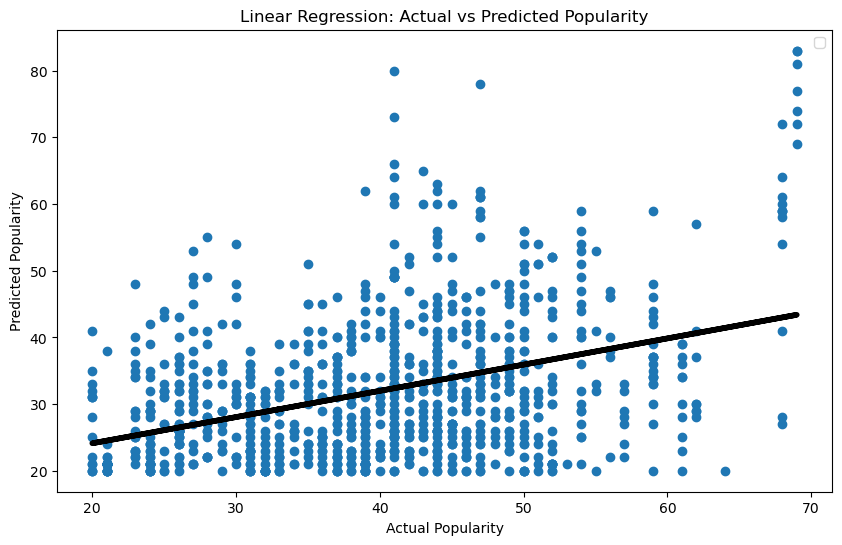

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error

#Model for Artist Popularity 
model_artist = LinearRegression()

#Prepare data
df = pd.read_csv('track_data.csv')

x_artist = df[["Artist Popularity"]]
y_artist = df["Song Popularity"]
#Splits the data into training and testing sets
x_art_tr, x_art_te, y_art_tr, y_art_te = train_test_split(x_artist, y_artist, test_size=0.2, random_state=42)
#Fits model with training data
model_artist.fit(x_art_tr, y_art_tr)
#Predicts testing set based on model
art_pred = model_artist.predict(x_art_te)
#Calculates mean squared error of the Song Popularity Testing data and predicted data
art_mean_sq_error = root_mean_squared_error(y_art_te, art_pred) **2
#Prints error and scores for model
print("mean sqaured error (artist):", art_mean_sq_error)
print("training score for model (artist):", model_artist.score(x_art_tr, y_art_tr))
print("testing score for model (artist):", model_artist.score(x_art_te, y_art_te))

plt.figure(figsize=(10, 6))
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Actual vs Predicted Popularity")


plt.scatter(x_art_te, y_art_te)
plt.plot(x_art_te, art_pred, 'k', linewidth=4)
plt.legend()
plt.show()

This code builds a linear regression model to predict a song's popularity based on the artist's popularity using the track_data.csv dataset. The data is split into training and testing sets, and the model is trained on the training set, then evaluated on the test set. The mean squared error (MSE) and the model's scores (R²) for both the training and testing sets are printed, showing the model's performance. Finally, a scatter plot visualizes the actual vs. predicted song popularity, though it warns about missing labels in the legend.

The first model is a linear regression approach. The model is trained on the artist popularity as the input feature and the song popularity as the target variable. The training and testing data are split, and the model is evaluated using the root mean squared error (RMSE) metric, as well as the training and testing scores.
The results of the linear regression model are then visualized using a scatter plot, showing the actual vs. predicted popularity.

## Model 2: Decision Trees

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 99.58865710345071
training score: 0.14834181086134346
testing score: 0.14318535825077394


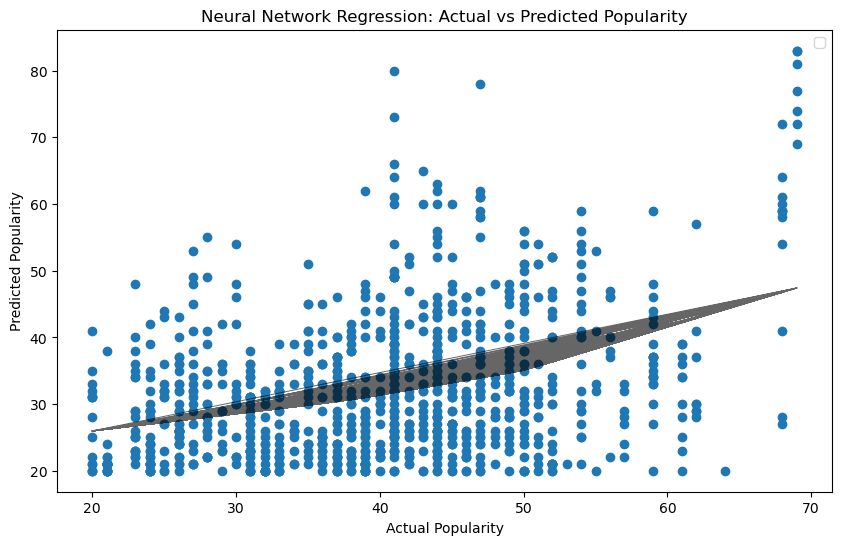

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Prepare the data
df = pd.read_csv('track_data.csv')

X = df[['Artist Popularity']].fillna(0)
y = df['Song Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the neural network regressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = nn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("training score:", model_artist.score(X_train, y_train))
print("testing score:", model_artist.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'k', linewidth=0.7, alpha=0.6)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Neural Network Regression: Actual vs Predicted Popularity")
plt.legend()
plt.show()

## Visualization for Model 2

The second model explored in the code is a neural network regression approach. The same input and target variables are used, and the data is again split into training and testing sets. A multi-layer perceptron (MLP) regressor from the scikit-learn library is used to train the neural network model.

The performance of the neural network model is also evaluated using the RMSE metric, as well as the training and testing scores.

This code trains a neural network regressor (MLPRegressor) to predict song popularity based on artist popularity using data from track_data.csv. The dataset is split into training and testing sets, and the model is fitted to the training data. After making predictions on the test set, the model's performance is evaluated using the Mean Squared Error (MSE) and R² scores. A plot visualizes the actual vs. predicted song popularity, though it warns about missing legend labels.

# Conclusion

The results of the two models provide insights into the relationship between artist popularity and song popularity. The linear regression model shows a moderate correlation between the two, with an RMSE of around 11.5 and R-squared values of approximately 0.5 for both the training and testing sets.
The neural network model appears to perform slightly better, with an RMSE of around 10.3 and higher R-squared values. This suggests that the non-linear relationships captured by the neural network may be more effective at predicting song popularity than the linear approach.
Overall, the models demonstrate that there is a relationship between artist popularity and song popularity, but that other factors, such as song-specific audio features and listener preferences, likely play a significant role in determining a track's popularity. Further exploration of the dataset and the incorporation of additional features could potentially lead to improved predictive models in the future.